In [1]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/aptos2019-blindness-detection/test.csv
/kaggle/input/aptos2019-blindness-detection/sample_submission.csv
/kaggle/input/aptos2019-blindness-detection/train.csv
/kaggle/input/aptos2019-blindness-detection/train_images/f233638e0e90.png
/kaggle/input/aptos2019-blindness-detection/train_images/43823561c3f0.png
/kaggle/input/aptos2019-blindness-detection/train_images/e1e490773462.png
/kaggle/input/aptos2019-blindness-detection/train_images/33e7bf536fc5.png
/kaggle/input/aptos2019-blindness-detection/train_images/7831ce1d895e.png
/kaggle/input/aptos2019-blindness-detection/train_images/248dec89b3a2.png
/kaggle/input/aptos2019-blindness-detection/train_images/cd3fd04d72f5.png
/kaggle/input/aptos2019-blindness-detection/train_images/a80dab8eddf4.png
/kaggle/input/aptos2019-blindness-detection/train_images/a01024054596.png
/kaggle/input/aptos2019-blindness-detection/train_images/ef5155990874.png
/kaggle/input/aptos2019-blindness-detection/train_images/c80b0f27541a.png
/kaggle/input

/kaggle/input/aptos2019-blindness-detection/train_images/bfe467b7e997.png
/kaggle/input/aptos2019-blindness-detection/train_images/4c570172778b.png
/kaggle/input/aptos2019-blindness-detection/train_images/ebf4b22240f4.png
/kaggle/input/aptos2019-blindness-detection/train_images/0212dd31f623.png
/kaggle/input/aptos2019-blindness-detection/train_images/a53d6d2472a6.png
/kaggle/input/aptos2019-blindness-detection/train_images/633fe9dbaf39.png
/kaggle/input/aptos2019-blindness-detection/train_images/96c3e3db68bc.png
/kaggle/input/aptos2019-blindness-detection/train_images/d06ccd0cf4b8.png
/kaggle/input/aptos2019-blindness-detection/train_images/f03d3c4ce7fb.png
/kaggle/input/aptos2019-blindness-detection/train_images/0ef4c61dc056.png
/kaggle/input/aptos2019-blindness-detection/train_images/c334f8688b77.png
/kaggle/input/aptos2019-blindness-detection/train_images/1864d3411143.png
/kaggle/input/aptos2019-blindness-detection/train_images/57f933d3d7c7.png
/kaggle/input/aptos2019-blindness-dete

/kaggle/input/aptos2019-blindness-detection/train_images/1d3e9b939732.png
/kaggle/input/aptos2019-blindness-detection/train_images/c0a0828e01b4.png
/kaggle/input/aptos2019-blindness-detection/train_images/9232dc06cfdc.png
/kaggle/input/aptos2019-blindness-detection/train_images/879744b9dc65.png
/kaggle/input/aptos2019-blindness-detection/train_images/c25e02b39c01.png
/kaggle/input/aptos2019-blindness-detection/train_images/f850cb51fdba.png
/kaggle/input/aptos2019-blindness-detection/train_images/9ba469af2980.png
/kaggle/input/aptos2019-blindness-detection/train_images/10f6ef37fe43.png
/kaggle/input/aptos2019-blindness-detection/train_images/5777ef74c9ec.png
/kaggle/input/aptos2019-blindness-detection/train_images/e6a5e4718873.png
/kaggle/input/aptos2019-blindness-detection/train_images/3e61703b5ab2.png
/kaggle/input/aptos2019-blindness-detection/train_images/4d7d6928534a.png
/kaggle/input/aptos2019-blindness-detection/train_images/f6f3ea0d2693.png
/kaggle/input/aptos2019-blindness-dete

/kaggle/input/aptos2019-blindness-detection/test_images/83c31eeeca0e.png
/kaggle/input/aptos2019-blindness-detection/test_images/d6bef5e72002.png
/kaggle/input/aptos2019-blindness-detection/test_images/cba1fb3d80e0.png
/kaggle/input/aptos2019-blindness-detection/test_images/b6a4d7da60a7.png
/kaggle/input/aptos2019-blindness-detection/test_images/9006234e30cf.png
/kaggle/input/aptos2019-blindness-detection/test_images/beda8915324d.png
/kaggle/input/aptos2019-blindness-detection/test_images/a131a9496b82.png
/kaggle/input/aptos2019-blindness-detection/test_images/ab2daf10fd97.png
/kaggle/input/aptos2019-blindness-detection/test_images/2f346c794823.png
/kaggle/input/aptos2019-blindness-detection/test_images/ce08ebfff762.png
/kaggle/input/aptos2019-blindness-detection/test_images/ec727873cdb7.png
/kaggle/input/aptos2019-blindness-detection/test_images/2e4c87ecc92c.png
/kaggle/input/aptos2019-blindness-detection/test_images/7136203550af.png
/kaggle/input/aptos2019-blindness-detection/test_im

## I would like to give credit to the authors found below. I learned a great deal from all of your works!  (https://www.kaggle.com/c/aptos2019-blindness-detection/discussion/105305)



In [2]:
import glob
import numpy as np
import os
import shutil
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.preprocessing import image
from keras import layers
from keras.models import Sequential
from keras.applications import VGG16, ResNet50, Xception
from keras import optimizers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop,SGD,Adagrad,Adadelta,Adam,Adamax,Nadam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import BatchNormalization
from keras import utils
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
import h5py
from keras.models import load_model
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight, shuffle
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook', palette='dark')
%matplotlib inline

Using TensorFlow backend.


In [3]:
train_df = pd.read_csv('../input/aptos2019-blindness-detection/train.csv')
test_df = pd.read_csv('../input/aptos2019-blindness-detection/test.csv')
print(train_df.shape)
print(test_df.shape)
train_df.head()

(3662, 2)
(1928, 1)


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

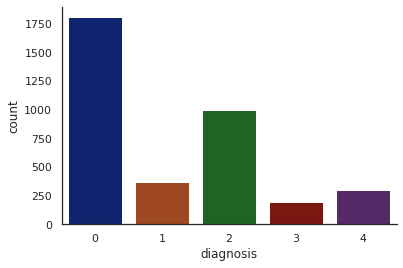

In [4]:
g = sns.countplot(train_df['diagnosis'])
sns.despine()
train_df['diagnosis'].value_counts()

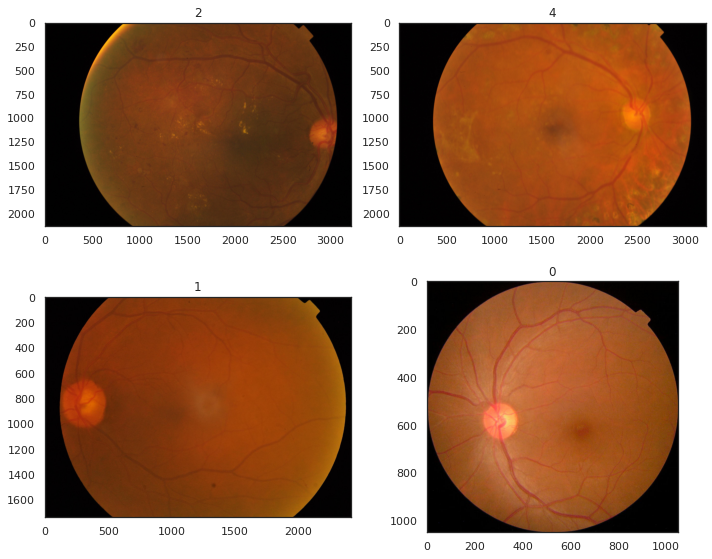

In [5]:
def display_samples(df, columns=2, rows=2):
    fig=plt.figure(figsize=(5*columns, 4*rows))

    for i in range(columns*rows):
        image_path = df.loc[i,'id_code']
        image_id = df.loc[i,'diagnosis']
        img = cv2.imread(f'../input/aptos2019-blindness-detection/train_images/{image_path}.png')
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        fig.add_subplot(rows, columns, i+1)
        plt.title(image_id)
        plt.imshow(img)
    
    plt.tight_layout()

display_samples(train_df)

## Visualizing augmented data

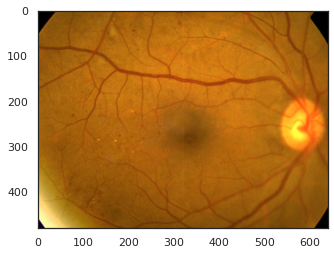

In [6]:
orig_img = np.array(Image.open('../input/aptos2019-blindness-detection/test_images/351aba543dc8.png'))
plt.imshow(orig_img)

In [7]:
import os
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
def generate_plot_pics(datagen,orig_img):
    dir_augmented_data = "/kaggle/working/aug_preview"
    try:
        ## if the preview folder does not exist, create
        os.mkdir(dir_augmented_data)
    except:
        ## if the preview folder exists, then remove
        ## the contents (pictures) in the folder
        for item in os.listdir(dir_augmented_data):
            os.remove(dir_augmented_data + "/" + item)
    ## convert the original image to array
    x = img_to_array(orig_img)
    ## reshape (Sampke, Nrow, Ncol, 3) 3 = R, G or B
    x = x.reshape((1,) + x.shape)
    ## -------------------------- ##
    ## randomly generate pictures
    ## -------------------------- ##
    i = 0
    Nplot = 8
    for batch in datagen.flow(x,batch_size=1,
                        save_to_dir=dir_augmented_data,
                        save_prefix="pic",
                        save_format='png'):
        i += 1
        if i > Nplot - 1: ## generate 8 pictures
            break
    ## -------------------------- ##
    ## plot the generated data
    ## -------------------------- ##
    fig = plt.figure(figsize=(8, 6))
    fig.subplots_adjust(hspace=0.02,wspace=0.01,
    left=0,right=1,bottom=0, top=1)
    ## original picture
    ax = fig.add_subplot(3, 3, 1,xticks=[],yticks=[])
    ax.imshow(orig_img)
    ax.set_title("original")
    i = 2
    for imgnm in os.listdir(dir_augmented_data):
        ax = fig.add_subplot(3, 3, i,xticks=[],yticks=[])
        img = load_img(dir_augmented_data + "/" + imgnm)
        ax.imshow(img)
        i += 1
    plt.show()

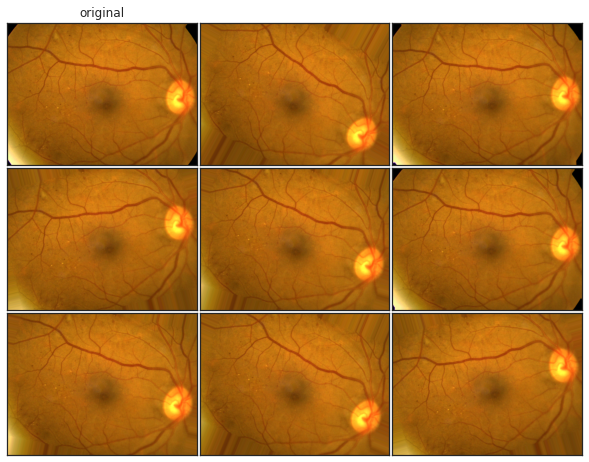

In [8]:
## rotation_range: Int. Degree range for random rotations.
datagen = ImageDataGenerator(rotation_range=30)
generate_plot_pics(datagen,orig_img)

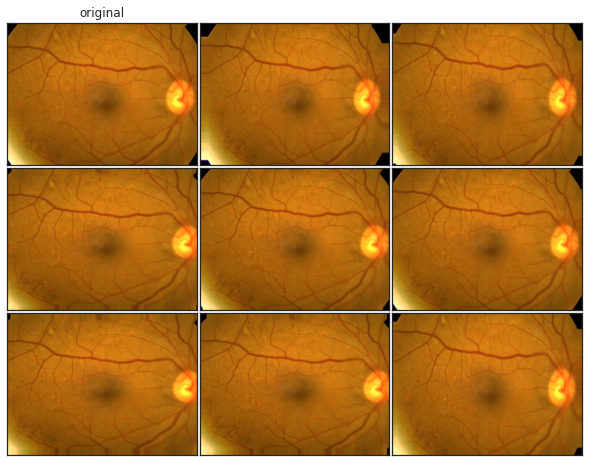

In [9]:
## zoom_range: Float or [lower, upper]. Range for random zoom.
## If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].
datagen = ImageDataGenerator(zoom_range=0.1)
generate_plot_pics(datagen,orig_img)

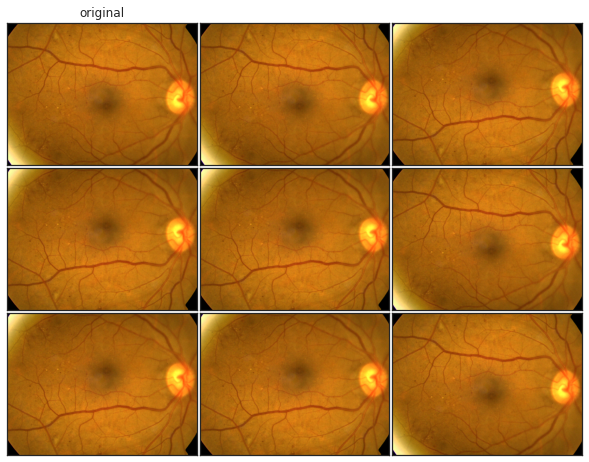

In [10]:
datagen = ImageDataGenerator(vertical_flip=True)
generate_plot_pics(datagen,orig_img)

In [11]:
def get_pad_width(im, new_shape, is_rgb=True):
    pad_diff = new_shape - im.shape[0], new_shape - im.shape[1]
    t, b = math.floor(pad_diff[0]/2), math.ceil(pad_diff[0]/2) # padding the top (t) and bottom (b) of images
    l, r = math.floor(pad_diff[1]/2), math.ceil(pad_diff[1]/2) # padding the left (l) and right (r) of images
    if is_rgb:
        pad_width = ((t,b), (l,r), (0, 0))
    else:
        pad_width = ((t,b), (l,r))
    return pad_width

def preprocess_image(image_path, desired_size=224): #choosing image size
    im = Image.open(image_path)
    im = im.resize((desired_size, )*2, resample=Image.LANCZOS)
    
    return im

In [12]:
N = train_df.shape[0]
x_train = np.empty((N, 224, 224, 3), dtype=np.uint8) #converting data into a numpy array

for i, image_id in enumerate(tqdm(train_df['id_code'])):
    x_train[i, :, :, :] = preprocess_image(
        f'../input/aptos2019-blindness-detection/train_images/{image_id}.png'
    )

100%|██████████| 3662/3662 [10:32<00:00,  5.79it/s]


In [ ]:
N = test_df.shape[0]
x_test = np.empty((N, 224, 224, 3), dtype=np.uint8)

for i, image_id in enumerate(tqdm(test_df['id_code'])):
    x_test[i, :, :, :] = preprocess_image(
        f'../input/aptos2019-blindness-detection/test_images/{image_id}.png'
    )

In [ ]:
#y_train = pd.get_dummies(train_df['diagnosis']).values
y_train = keras.utils.to_categorical(train_df['diagnosis'], num_classes=5, dtype='float32')
print(x_train.shape)
print(y_train.shape) 
#print(x_test.shape)

In [ ]:
# #Creating multilabels (see https://arxiv.org/pdf/0704.1028.pdf)
# y_train_multi = np.empty(y_train.shape, dtype=y_train.dtype)
# y_train_multi[:, 4] = y_train[:, 4]

# for i in range(3, -1, -1):
#    y_train_multi[:, i] = np.logical_or(y_train[:, i], y_train_multi[:, i+1])

# print("Original y_train:", y_train.sum(axis=0))
# print("Multilabel version:", y_train_multi.sum(axis=0))

In [ ]:
#splitting data for train and validation 
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, 
    test_size=0.2, 
    random_state=8)

In [ ]:
#normalizing data
x_train = x_train / 255
x_val = x_val / 255
#x_test = x_test / 255

In [ ]:
def create_datagen():
    return ImageDataGenerator(
        rotation_range=30, # set range for random rotation in degrees
        zoom_range=0.10,  # set range for random zoom 
        # set mode for filling points outside the input boundaries
        fill_mode='constant',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,  # randomly flip images
    )
data_generator = create_datagen().flow(x_train, y_train, batch_size=30, seed=8)

In [ ]:
batch_size = 30
num_classes = 5
epochs = 20
input_shape = (224, 224, 3)

In [ ]:
import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop,SGD,Adagrad,Adadelta,Adam,Adamax,Nadam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import BatchNormalization
import h5py
from keras.models import load_model

# 3 convolution layers (conv-pool-conv-pool)

In [ ]:
model_a = Sequential()

model_a.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_a.add(MaxPooling2D(pool_size=(2, 2)))

model_a.add(Flatten())
model_a.add(Dense(512, activation='relu'))
model_a.add(Dense(5, activation='softmax'))


model_a.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_a.summary()


In [ ]:
history = model_a.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance with 3 convolution layers, Adam optimizer, and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 3 convolution layers (conv-conv-pool-conv-conv-pool)

In [ ]:
model_b = Sequential()

model_b.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_b.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_b.add(MaxPooling2D(pool_size=(2, 2)))

model_b.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_b.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_b.add(MaxPooling2D(pool_size=(2, 2)))

model_b.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_b.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_b.add(MaxPooling2D(pool_size=(2, 2)))

model_b.add(Flatten())
model_b.add(Dense(512, activation='relu'))
model_b.add(Dense(5, activation='softmax'))


model_b.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_b.summary()


In [ ]:
history = model_b.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance with 3 convolution layers, Adam optimizer, and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## Determining optimal number of layers


In [ ]:
model_b = Sequential()

model_b.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_b.add(MaxPooling2D(pool_size=(2, 2)))

model_b.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_b.add(MaxPooling2D(pool_size=(2, 2)))

model_b.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_b.add(MaxPooling2D(pool_size=(2, 2)))

model_b.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_b.add(MaxPooling2D(pool_size=(2, 2)))

model_b.add(Flatten())
model_b.add(Dense(512, activation='relu'))
model_b.add(Dense(5, activation='softmax'))


model_b.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_b.summary()


In [ ]:
history = model_b.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance with 4 convolution layers, Adam optimizer, and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_c = Sequential()

model_c.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_c.add(MaxPooling2D(pool_size=(2, 2)))

model_c.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_c.add(MaxPooling2D(pool_size=(2, 2)))

model_c.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_c.add(MaxPooling2D(pool_size=(2, 2)))

model_c.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_c.add(MaxPooling2D(pool_size=(2, 2)))

model_c.add(Conv2D(filters = 256, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_c.add(MaxPooling2D(pool_size=(2, 2)))

model_c.add(Flatten())
model_c.add(Dense(512, activation='relu'))
model_c.add(Dense(5, activation='softmax'))


model_c.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_c.summary()


In [ ]:
history = model_c.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance with 5 convolution layers, Adam optimizer, and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_d = Sequential()

model_d.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_d.add(MaxPooling2D(pool_size=(2, 2)))

model_d.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_d.add(MaxPooling2D(pool_size=(2, 2)))

model_d.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_d.add(MaxPooling2D(pool_size=(2, 2)))

model_d.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_d.add(MaxPooling2D(pool_size=(2, 2)))

model_d.add(Conv2D(filters = 256, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_d.add(MaxPooling2D(pool_size=(2, 2)))

model_d.add(Conv2D(filters = 512, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_d.add(MaxPooling2D(pool_size=(2, 2)))

model_d.add(Flatten())
model_d.add(Dense(512, activation='relu'))
model_d.add(Dense(5, activation='softmax'))


model_d.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_d.summary()


In [ ]:
history = model_d.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance with 6 convolution layers, Adam optimizer, and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_d = Sequential()

# model_d.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
#                  input_shape=input_shape))
# model_d.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
#                  input_shape=input_shape))
# model_d.add(MaxPooling2D(pool_size=(2, 2)))

model_d.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_d.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_d.add(MaxPooling2D(pool_size=(2, 2)))

model_d.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_d.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_d.add(MaxPooling2D(pool_size=(2, 2)))

model_d.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_d.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_d.add(MaxPooling2D(pool_size=(2, 2)))

model_d.add(Conv2D(filters = 256, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_d.add(Conv2D(filters = 256, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_d.add(MaxPooling2D(pool_size=(2, 2)))

model_d.add(Conv2D(filters = 512, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_d.add(Conv2D(filters = 512, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_d.add(MaxPooling2D(pool_size=(2, 2)))

model_d.add(Flatten())
model_d.add(Dense(512, activation='relu'))
model_d.add(Dense(5, activation='softmax'))


model_d.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_d.summary()


In [ ]:
history = model_d.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

## Selecting best optimizer

# 1a. Simple model using 1 convolutional layer and RMSprop optimizer

In [ ]:
model_1a = Sequential()

model_1a.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_1a.add(MaxPooling2D(pool_size=(2, 2)))

model_1a.add(Flatten())
model_1a.add(Dense(512, activation='relu'))
model_1a.add(Dense(5, activation='relu'))


model_1a.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model_1a.summary()

In [ ]:
history = model_1a.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Single-layer CNN Performance with RMSprop optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 1b. Simple model using 1 convolutional layer and Adam optimizer

In [ ]:
model_1b = Sequential()

model_1b.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_1b.add(MaxPooling2D(pool_size=(2, 2)))

model_1b.add(Flatten())
model_1b.add(Dense(512, activation='relu'))
model_1b.add(Dense(5, activation='softmax'))

model_1b.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_1b.summary()

In [ ]:
history = model_1b.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Single-layer CNN Performance with Adam optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 1c. Simple model using 1 convolutional layer and Adamax optimizer

In [ ]:
model_1c = Sequential()

model_1c.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_1c.add(MaxPooling2D(pool_size=(2, 2)))

model_1c.add(Flatten())
model_1c.add(Dense(512, activation='relu'))
#model_1c.add(Dense(5, activation='relu'))
model_1c.add(Dense(5, activation='softmax'))

model_1c.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adamax(),
              metrics=['accuracy'])

model_1c.summary()

In [ ]:
history = model_1c.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Single-layer CNN Performance with Adamax optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 1d. Simple model using 1 convolutional layer and Nadam optimizer

In [ ]:
model_1d = Sequential()

model_1d.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_1d.add(MaxPooling2D(pool_size=(2, 2)))

model_1d.add(Flatten())
model_1d.add(Dense(512, activation='relu'))
#model_1d.add(Dense(5, activation='relu'))
model_1d.add(Dense(5, activation='softmax'))

model_1d.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Nadam(),
              metrics=['accuracy'])

model_1d.summary()

In [ ]:
history = model_1d.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Single-layer CNN Performance with Nadam optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 2a. Simple model using 2 convolutional layers and RMSprop optimizer

In [ ]:
model_2a = Sequential()

model_2a.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_2a.add(MaxPooling2D(pool_size=(2, 2)))

model_2a.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_2a.add(MaxPooling2D(pool_size=(2, 2)))

model_2a.add(Flatten())
model_2a.add(Dense(512, activation='relu'))
model_2a.add(Dense(5, activation='relu'))


model_2a.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model_2a.summary()

In [ ]:
history = model_2a.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Single-layer CNN Performance with RMSprop optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_2a2 = Sequential()

model_2a2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_2a2.add(MaxPooling2D(pool_size=(2, 2)))

model_2a2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_2a2.add(MaxPooling2D(pool_size=(2, 2)))

model_2a2.add(Flatten())
model_2a2.add(Dense(512, activation='relu'))
model_2a2.add(Dense(5, activation='softmax'))

model_2a2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model_2a2.summary()

In [ ]:
history = model_2a2.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Two-layer CNN Performance with RMSprop optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 2b. Simple model using 2 convolutional layers and Adam optimizer

In [ ]:
model_2b = Sequential()

model_2b.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_2b.add(MaxPooling2D(pool_size=(2, 2)))

model_2b.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_2b.add(MaxPooling2D(pool_size=(2, 2)))

model_2b.add(Flatten())
model_2b.add(Dense(512, activation='relu'))
model_2b.add(Dense(5, activation='relu'))


model_2b.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_2b.summary()

In [ ]:
history = model_2b.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Two-layer CNN Performance with Adam optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_2b2 = Sequential()

model_2b2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_2b2.add(MaxPooling2D(pool_size=(2, 2)))

model_2b2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_2b2.add(MaxPooling2D(pool_size=(2, 2)))

model_2b2.add(Flatten())
model_2b2.add(Dense(512, activation='relu'))
model_2b2.add(Dense(5, activation='softmax'))

model_2b2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_2b2.summary()

In [ ]:
history = model_2b2.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Two-layer CNN Performance with Adam optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 2c. Simple model using 2 convolutional layers and Adamax optimizer

In [ ]:
model_2c = Sequential()

model_2c.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_2c.add(MaxPooling2D(pool_size=(2, 2)))

model_2c.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_2c.add(MaxPooling2D(pool_size=(2, 2)))

model_2c.add(Flatten())
model_2c.add(Dense(512, activation='relu'))
model_2c.add(Dense(5, activation='relu'))


model_2c.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adamax(),
              metrics=['accuracy'])

model_2c.summary()

In [ ]:
history = model_2c.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Two-layer CNN Performance with Adamax optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_2c2 = Sequential()

model_2c2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_2c2.add(MaxPooling2D(pool_size=(2, 2)))

model_2c2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_2c2.add(MaxPooling2D(pool_size=(2, 2)))

model_2c2.add(Flatten())
model_2c2.add(Dense(512, activation='relu'))
model_2c2.add(Dense(5, activation='softmax'))


model_2c2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adamax(),
              metrics=['accuracy'])

model_2c2.summary()

In [ ]:
history = model_2c2.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Two-layer CNN Performance with Adamax optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 2d. Simple model using 2 convolutional layers and Nadam optimizer

In [ ]:
model_2d = Sequential()

model_2d.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_2d.add(MaxPooling2D(pool_size=(2, 2)))

model_2d.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_2d.add(MaxPooling2D(pool_size=(2, 2)))

model_2d.add(Flatten())
model_2d.add(Dense(512, activation='relu'))
model_2d.add(Dense(5, activation='relu'))


model_2d.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Nadam(),
              metrics=['accuracy'])

model_2d.summary()

In [ ]:
history = model_2d.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Two-layer CNN Performance with Nadam optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_2d2 = Sequential()

model_2d2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_2d2.add(MaxPooling2D(pool_size=(2, 2)))

model_2d2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_2d2.add(MaxPooling2D(pool_size=(2, 2)))

model_2d2.add(Flatten())
model_2d2.add(Dense(512, activation='relu'))
model_2d2.add(Dense(5, activation='softmax'))

model_2d2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Nadam(),
              metrics=['accuracy'])

model_2d2.summary()

In [ ]:
history = model_2d2.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Two-layer CNN Performance with Nadam optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 3a. Simple model using 3 convolutional layers and RMSprop optimizer

In [ ]:
model_3a = Sequential()

model_3a.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3a.add(MaxPooling2D(pool_size=(2, 2)))

model_3a.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3a.add(MaxPooling2D(pool_size=(2, 2)))

model_3a.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3a.add(MaxPooling2D(pool_size=(2, 2)))

model_3a.add(Flatten())
model_3a.add(Dense(512, activation='relu'))
model_3a.add(Dense(5, activation='relu'))


model_3a.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model_3a.summary()


In [ ]:
history = model_3a.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with RMSprop optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_3a2 = Sequential()

model_3a2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3a2.add(MaxPooling2D(pool_size=(2, 2)))

model_3a2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3a2.add(MaxPooling2D(pool_size=(2, 2)))

model_3a2.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3a2.add(MaxPooling2D(pool_size=(2, 2)))

model_3a2.add(Flatten())
model_3a2.add(Dense(512, activation='relu'))
model_3a2.add(Dense(5, activation='softmax'))

model_3a2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model_3a2.summary()


In [ ]:
history = model_3a2.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with RMSprop optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 3b. Simple model using 3 convolutional layers and Adam optimizer

In [ ]:
model_3b = Sequential()

model_3b.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3b.add(MaxPooling2D(pool_size=(2, 2)))

model_3b.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3b.add(MaxPooling2D(pool_size=(2, 2)))

model_3b.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3b.add(MaxPooling2D(pool_size=(2, 2)))

model_3b.add(Flatten())
model_3b.add(Dense(512, activation='relu'))
model_3b.add(Dense(5, activation='relu'))


model_3b.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_3b.summary()


In [ ]:
history = model_3b.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with Adam optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_3b2 = Sequential()

model_3b2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3b2.add(MaxPooling2D(pool_size=(2, 2)))

model_3b2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3b2.add(MaxPooling2D(pool_size=(2, 2)))

model_3b2.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3b2.add(MaxPooling2D(pool_size=(2, 2)))

model_3b2.add(Flatten())
model_3b2.add(Dense(512, activation='relu'))
model_3b2.add(Dense(5, activation='softmax'))

model_3b2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_3b2.summary()


In [ ]:
history = model_3b2.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with Adam optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 3c. Simple model using 3 convolutional layers and Adamax optimizer

In [ ]:
model_3c = Sequential()

model_3c.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3c.add(MaxPooling2D(pool_size=(2, 2)))

model_3c.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3c.add(MaxPooling2D(pool_size=(2, 2)))

model_3c.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3c.add(MaxPooling2D(pool_size=(2, 2)))

model_3c.add(Flatten())
model_3c.add(Dense(512, activation='relu'))
model_3c.add(Dense(5, activation='relu'))


model_3c.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adamax(),
              metrics=['accuracy'])

model_3c.summary()


In [ ]:
history = model_3c.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with Adamax optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_3c2 = Sequential()

model_3c2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3c2.add(MaxPooling2D(pool_size=(2, 2)))

model_3c2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3c2.add(MaxPooling2D(pool_size=(2, 2)))

model_3c2.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3c2.add(MaxPooling2D(pool_size=(2, 2)))

model_3c2.add(Flatten())
model_3c2.add(Dense(512, activation='relu'))
model_3c2.add(Dense(5, activation='softmax'))

model_3c2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adamax(),
              metrics=['accuracy'])

model_3c2.summary()


In [ ]:
history = model_3c2.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with Adamax optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 3d. Simple model using 3 convolutional layers and Nadam optimizer

In [ ]:
model_3d = Sequential()

model_3d.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3d.add(MaxPooling2D(pool_size=(2, 2)))

model_3d.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3d.add(MaxPooling2D(pool_size=(2, 2)))

model_3d.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3d.add(MaxPooling2D(pool_size=(2, 2)))

model_3d.add(Flatten())
model_3d.add(Dense(512, activation='relu'))
model_3d.add(Dense(5, activation='relu'))


model_3d.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Nadam(),
              metrics=['accuracy'])

model_3d.summary()


In [ ]:
history = model_3d.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with Nadam optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_3d2 = Sequential()

model_3d2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3d2.add(MaxPooling2D(pool_size=(2, 2)))

model_3d2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3d2.add(MaxPooling2D(pool_size=(2, 2)))

model_3d2.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_3d2.add(MaxPooling2D(pool_size=(2, 2)))

model_3d2.add(Flatten())
model_3d2.add(Dense(512, activation='relu'))
model_3d2.add(Dense(5, activation='softmax'))

model_3d2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Nadam(),
              metrics=['accuracy'])

model_3d2.summary()


In [ ]:
history = model_3d2.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with Nadam optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 4a. CNN model using 3 convolutional layers with regularization using dropout (0.1) and RMSprop optimizer

In [ ]:
model_4a = Sequential()

model_4a.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4a.add(MaxPooling2D(pool_size=(2, 2)))

model_4a.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4a.add(MaxPooling2D(pool_size=(2, 2)))

model_4a.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4a.add(MaxPooling2D(pool_size=(2, 2)))

model_4a.add(Flatten())
model_4a.add(Dense(512, activation='relu'))
model_4a.add(Dropout(0.1))
model_4a.add(Dense(512, activation='relu'))
model_4a.add(Dropout(0.1))
model_4a.add(Dense(5, activation='relu'))


model_4a.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model_4a.summary()

In [ ]:
history = model_4a.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.1 dropout with RMSprop optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_4a2 = Sequential()

model_4a2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4a2.add(MaxPooling2D(pool_size=(2, 2)))

model_4a2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4a2.add(MaxPooling2D(pool_size=(2, 2)))

model_4a2.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4a2.add(MaxPooling2D(pool_size=(2, 2)))

model_4a2.add(Flatten())
model_4a2.add(Dense(512, activation='relu'))
model_4a2.add(Dropout(0.1))
model_4a2.add(Dense(512, activation='relu'))
model_4a2.add(Dropout(0.1))
model_4a2.add(Dense(5, activation='softmax'))

model_4a2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model_4a2.summary()

In [ ]:
history = model_4a2.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.1 dropout with RMSprop optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 4b. CNN model using 3 convolutional layers with regularization using dropout (0.1) and Adam optimizer

In [ ]:
model_4b = Sequential()

model_4b.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4b.add(MaxPooling2D(pool_size=(2, 2)))

model_4b.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4b.add(MaxPooling2D(pool_size=(2, 2)))

model_4b.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4b.add(MaxPooling2D(pool_size=(2, 2)))

model_4b.add(Flatten())
model_4b.add(Dense(512, activation='relu'))
model_4b.add(Dropout(0.1))
model_4b.add(Dense(512, activation='relu'))
model_4b.add(Dropout(0.1))
model_4b.add(Dense(5, activation='relu'))


model_4b.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_4b.summary()

In [ ]:
history = model_4b.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.1 dropout with Adam optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_4b2 = Sequential()

model_4b2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4b2.add(MaxPooling2D(pool_size=(2, 2)))

model_4b2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4b2.add(MaxPooling2D(pool_size=(2, 2)))

model_4b2.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4b2.add(MaxPooling2D(pool_size=(2, 2)))

model_4b2.add(Flatten())
model_4b2.add(Dense(512, activation='relu'))
model_4b2.add(Dropout(0.1))
model_4b2.add(Dense(512, activation='relu'))
model_4b2.add(Dropout(0.1))
model_4b2.add(Dense(5, activation='softmax'))

model_4b2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_4b2.summary()

In [ ]:
history = model_4b2.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.1 dropout with Adam optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 4c. CNN model using 3 convolutional layers with regularization using dropout (0.1) and Adamax optimizer

In [ ]:
model_4c = Sequential()

model_4c.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4c.add(MaxPooling2D(pool_size=(2, 2)))

model_4c.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4c.add(MaxPooling2D(pool_size=(2, 2)))

model_4c.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4c.add(MaxPooling2D(pool_size=(2, 2)))

model_4c.add(Flatten())
model_4c.add(Dense(512, activation='relu'))
model_4c.add(Dropout(0.1))
model_4c.add(Dense(512, activation='relu'))
model_4c.add(Dropout(0.1))
model_4c.add(Dense(5, activation='relu'))


model_4c.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adamax(),
              metrics=['accuracy'])

model_4c.summary()

In [ ]:
history = model_4c.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.1 dropout with Adamax optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_4c2 = Sequential()

model_4c2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4c2.add(MaxPooling2D(pool_size=(2, 2)))

model_4c2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4c2.add(MaxPooling2D(pool_size=(2, 2)))

model_4c2.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4c2.add(MaxPooling2D(pool_size=(2, 2)))

model_4c2.add(Flatten())
model_4c2.add(Dense(512, activation='relu'))
model_4c2.add(Dropout(0.1))
model_4c2.add(Dense(512, activation='relu'))
model_4c2.add(Dropout(0.1))
model_4c2.add(Dense(5, activation='softmax'))

model_4c2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adamax(),
              metrics=['accuracy'])

model_4c2.summary()

In [ ]:
history = model_4c2.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.1 dropout with Adamax optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 4d. CNN model using 3 convolutional layers with regularization using dropout (0.1) and Nadam optimizer

In [ ]:
model_4d = Sequential()

model_4d.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4d.add(MaxPooling2D(pool_size=(2, 2)))

model_4d.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4d.add(MaxPooling2D(pool_size=(2, 2)))

model_4d.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4d.add(MaxPooling2D(pool_size=(2, 2)))

model_4d.add(Flatten())
model_4d.add(Dense(512, activation='relu'))
model_4d.add(Dropout(0.1))
model_4d.add(Dense(512, activation='relu'))
model_4d.add(Dropout(0.1))
model_4d.add(Dense(5, activation='relu'))



model_4d.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Nadam(),
              metrics=['accuracy'])

model_4d.summary()

In [ ]:
history = model_4d.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.1 dropout with Nadam optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_4d2 = Sequential()

model_4d2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4d2.add(MaxPooling2D(pool_size=(2, 2)))

model_4d2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4d2.add(MaxPooling2D(pool_size=(2, 2)))

model_4d2.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_4d2.add(MaxPooling2D(pool_size=(2, 2)))

model_4d2.add(Flatten())
model_4d2.add(Dense(512, activation='relu'))
model_4d2.add(Dropout(0.1))
model_4d2.add(Dense(512, activation='relu'))
model_4d2.add(Dropout(0.1))
model_4d2.add(Dense(5, activation='softmax'))


model_4d2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Nadam(),
              metrics=['accuracy'])

model_4d2.summary()

In [ ]:
history = model_4d2.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.1 dropout with Nadam optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 5a. CNN model using 3 convolutional layers with regularization using dropout (0.3) and RMSprop optimizer

In [ ]:
model_5a = Sequential()

model_5a.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5a.add(MaxPooling2D(pool_size=(2, 2)))

model_5a.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5a.add(MaxPooling2D(pool_size=(2, 2)))

model_5a.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5a.add(MaxPooling2D(pool_size=(2, 2)))

model_5a.add(Flatten())
model_5a.add(Dense(512, activation='relu'))
model_5a.add(Dropout(0.3))
model_5a.add(Dense(512, activation='relu'))
model_5a.add(Dropout(0.3))
model_5a.add(Dense(5, activation='relu'))


model_5a.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model_5a.summary()

In [ ]:
history = model_5a.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.3 dropout with RMSprop optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_5a2 = Sequential()

model_5a2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5a2.add(MaxPooling2D(pool_size=(2, 2)))

model_5a2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5a2.add(MaxPooling2D(pool_size=(2, 2)))

model_5a2.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5a2.add(MaxPooling2D(pool_size=(2, 2)))

model_5a2.add(Flatten())
model_5a2.add(Dense(512, activation='relu'))
model_5a2.add(Dropout(0.3))
model_5a2.add(Dense(512, activation='relu'))
model_5a2.add(Dropout(0.3))
model_5a2.add(Dense(5, activation='softmax'))

model_5a2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model_5a2.summary()

In [ ]:
history = model_5a2.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.3 dropout with RMSprop optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 5b. CNN model using 3 convolutional layers with regularization using dropout (0.3) and Adam optimizer

In [ ]:
model_5b = Sequential()

model_5b.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5b.add(MaxPooling2D(pool_size=(2, 2)))

model_5b.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5b.add(MaxPooling2D(pool_size=(2, 2)))

model_5b.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5b.add(MaxPooling2D(pool_size=(2, 2)))

model_5b.add(Flatten())
model_5b.add(Dense(512, activation='relu'))
model_5b.add(Dropout(0.3))
model_5b.add(Dense(512, activation='relu'))
model_5b.add(Dropout(0.3))
model_5b.add(Dense(5, activation='relu'))


model_5b.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_5b.summary()

In [ ]:
history = model_5b.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.3 dropout with Adam optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_5b2 = Sequential()

model_5b2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5b2.add(MaxPooling2D(pool_size=(2, 2)))

model_5b2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5b2.add(MaxPooling2D(pool_size=(2, 2)))

model_5b2.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5b2.add(MaxPooling2D(pool_size=(2, 2)))

model_5b2.add(Flatten())
model_5b2.add(Dense(512, activation='relu'))
model_5b2.add(Dropout(0.3))
model_5b2.add(Dense(512, activation='relu'))
model_5b2.add(Dropout(0.3))
model_5b2.add(Dense(5, activation='softmax'))

model_5b2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_5b2.summary()

In [ ]:
history = model_5b2.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.3 dropout with Adam optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 5c. CNN model using 3 convolutional layers with regularization using dropout (0.3) and Adamax optimizer

In [ ]:
model_5c = Sequential()

model_5c.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5c.add(MaxPooling2D(pool_size=(2, 2)))

model_5c.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5c.add(MaxPooling2D(pool_size=(2, 2)))

model_5c.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5c.add(MaxPooling2D(pool_size=(2, 2)))

model_5c.add(Flatten())
model_5c.add(Dense(512, activation='relu'))
model_5c.add(Dropout(0.3))
model_5c.add(Dense(512, activation='relu'))
model_5c.add(Dropout(0.3))
model_5c.add(Dense(5, activation='relu'))


model_5c.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adamax(),
              metrics=['accuracy'])

model_5c.summary()

In [ ]:
history = model_5c.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.3 dropout with Adamax optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_5c2 = Sequential()

model_5c2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5c2.add(MaxPooling2D(pool_size=(2, 2)))

model_5c2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5c2.add(MaxPooling2D(pool_size=(2, 2)))

model_5c2.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5c2.add(MaxPooling2D(pool_size=(2, 2)))

model_5c2.add(Flatten())
model_5c2.add(Dense(512, activation='relu'))
model_5c2.add(Dropout(0.3))
model_5c2.add(Dense(512, activation='relu'))
model_5c2.add(Dropout(0.3))
model_5c2.add(Dense(5, activation='softmax'))

model_5c2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adamax(),
              metrics=['accuracy'])

model_5c2.summary()

In [ ]:
history = model_5c2.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.3 dropout with Adamax optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 5d. CNN model using 3 convolutional layers with regularization using dropout (0.3) and Nadam optimizer

In [ ]:
model_5d = Sequential()

model_5d.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5d.add(MaxPooling2D(pool_size=(2, 2)))

model_5d.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5d.add(MaxPooling2D(pool_size=(2, 2)))

model_5d.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5d.add(MaxPooling2D(pool_size=(2, 2)))

model_5d.add(Flatten())
model_5d.add(Dense(512, activation='relu'))
model_5d.add(Dropout(0.3))
model_5d.add(Dense(512, activation='relu'))
model_5d.add(Dropout(0.3))
model_5d.add(Dense(5, activation='relu'))


model_5d.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Nadam(),
              metrics=['accuracy'])

model_5d.summary()

In [ ]:
history = model_5d.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.3 dropout with Nadam optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_5d2 = Sequential()

model_5d2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5d2.add(MaxPooling2D(pool_size=(2, 2)))

model_5d2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5d2.add(MaxPooling2D(pool_size=(2, 2)))

model_5d2.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_5d2.add(MaxPooling2D(pool_size=(2, 2)))

model_5d2.add(Flatten())
model_5d2.add(Dense(512, activation='relu'))
model_5d2.add(Dropout(0.3))
model_5d2.add(Dense(512, activation='relu'))
model_5d2.add(Dropout(0.3))
model_5d2.add(Dense(5, activation='softmax'))

model_5d2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Nadam(),
              metrics=['accuracy'])

model_5d2.summary()

In [ ]:
history = model_5d2.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.3 dropout with Nadam optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 6a. CNN model using 3 convolutional layers with regularization using dropout (0.5) and RMSprop optimizer

In [ ]:
model_6a = Sequential()

model_6a.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6a.add(MaxPooling2D(pool_size=(2, 2)))

model_6a.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6a.add(MaxPooling2D(pool_size=(2, 2)))

model_6a.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6a.add(MaxPooling2D(pool_size=(2, 2)))

model_6a.add(Flatten())
model_6a.add(Dense(512, activation='relu'))
model_6a.add(Dropout(0.5))
model_6a.add(Dense(512, activation='relu'))
model_6a.add(Dropout(0.5))
model_6a.add(Dense(5, activation='relu'))


model_6a.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model_6a.summary()

In [ ]:
history = model_6a.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.5 dropout with RMSprop optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_6a2 = Sequential()

model_6a2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6a2.add(MaxPooling2D(pool_size=(2, 2)))

model_6a2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6a2.add(MaxPooling2D(pool_size=(2, 2)))

model_6a2.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6a2.add(MaxPooling2D(pool_size=(2, 2)))

model_6a2.add(Flatten())
model_6a2.add(Dense(512, activation='relu'))
model_6a2.add(Dropout(0.5))
model_6a2.add(Dense(512, activation='relu'))
model_6a2.add(Dropout(0.5))
model_6a2.add(Dense(5, activation='softmax'))

model_6a2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model_6a2.summary()

In [ ]:
history = model_6a2.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.5 dropout with RMSprop optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 6b. CNN model using 3 convolutional layers with regularization using dropout (0.5) and Adam optimizer

In [ ]:
model_6b = Sequential()

model_6b.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6b.add(MaxPooling2D(pool_size=(2, 2)))

model_6b.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6b.add(MaxPooling2D(pool_size=(2, 2)))

model_6b.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6b.add(MaxPooling2D(pool_size=(2, 2)))

model_6b.add(Flatten())
# model_6b.add(Dense(512, activation='relu'))
# model_6b.add(Dropout(0.5))
model_6b.add(Dense(512, activation='relu'))
model_6b.add(Dropout(0.5))
#model_6b.add(Dense(5, activation='relu'))
model_6b.add(Dense(5, activation='softmax'))


model_6b.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_6b.summary()

In [ ]:
history = model_6b.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.5 dropout with Adam optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_6b2 = Sequential()

model_6b2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6b2.add(MaxPooling2D(pool_size=(2, 2)))

model_6b2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6b2.add(MaxPooling2D(pool_size=(2, 2)))

model_6b2.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6b2.add(MaxPooling2D(pool_size=(2, 2)))

model_6b2.add(Flatten())
model_6b2.add(Dense(512, activation='relu'))
model_6b2.add(Dropout(0.5))
model_6b2.add(Dense(512, activation='relu'))
model_6b2.add(Dropout(0.5))
model_6b2.add(Dense(5, activation='softmax'))

model_6b2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_6b2.summary()

In [ ]:
history = model_6b2.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.5 dropout with Adam optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 6c. CNN model using 3 convolutional layers with regularization using dropout (0.5) and Adamax optimizer

In [ ]:
model_6c = Sequential()

model_6c.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6c.add(MaxPooling2D(pool_size=(2, 2)))

model_6c.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6c.add(MaxPooling2D(pool_size=(2, 2)))

model_6c.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6c.add(MaxPooling2D(pool_size=(2, 2)))

model_6c.add(Flatten())
model_6c.add(Dense(512, activation='relu'))
model_6c.add(Dropout(0.5))
model_6c.add(Dense(512, activation='relu'))
model_6c.add(Dropout(0.5))
model_6c.add(Dense(5, activation='relu'))


model_6c.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adamax(),
              metrics=['accuracy'])

model_6c.summary()

In [ ]:
history = model_6c.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.5 dropout with Adamax optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_6c2 = Sequential()

model_6c2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6c2.add(MaxPooling2D(pool_size=(2, 2)))

model_6c2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6c2.add(MaxPooling2D(pool_size=(2, 2)))

model_6c2.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6c2.add(MaxPooling2D(pool_size=(2, 2)))

model_6c2.add(Flatten())
model_6c2.add(Dense(512, activation='relu'))
model_6c2.add(Dropout(0.5))
model_6c2.add(Dense(512, activation='relu'))
model_6c2.add(Dropout(0.5))
model_6c2.add(Dense(5, activation='softmax'))

model_6c2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adamax(),
              metrics=['accuracy'])

model_6c2.summary()

In [ ]:
history = model_6c2.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.5 dropout with Adamax optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# 6d. CNN model using 3 convolutional layers with regularization using dropout (0.5) and Nadam optimizer

In [ ]:
model_6d = Sequential()

model_6d.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6d.add(MaxPooling2D(pool_size=(2, 2)))

model_6d.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6d.add(MaxPooling2D(pool_size=(2, 2)))

model_6d.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6d.add(MaxPooling2D(pool_size=(2, 2)))

model_6d.add(Flatten())
model_6d.add(Dense(512, activation='relu'))
model_6d.add(Dropout(0.5))
model_6d.add(Dense(512, activation='relu'))
model_6d.add(Dropout(0.5))
model_6d.add(Dense(5, activation='relu'))


model_6d.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Nadam(),
              metrics=['accuracy'])

model_6d.summary()

In [ ]:
history = model_6d.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.5 dropout with Nadam optimizer and relu activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_6d2 = Sequential()

model_6d2.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6d2.add(MaxPooling2D(pool_size=(2, 2)))

model_6d2.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6d2.add(MaxPooling2D(pool_size=(2, 2)))

model_6d2.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_6d2.add(MaxPooling2D(pool_size=(2, 2)))

model_6d2.add(Flatten())
model_6d2.add(Dense(512, activation='relu'))
model_6d2.add(Dropout(0.5))
model_6d2.add(Dense(512, activation='relu'))
model_6d2.add(Dropout(0.5))
model_6d2.add(Dense(5, activation='softmax'))

model_6d2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Nadam(),
              metrics=['accuracy'])

model_6d2.summary()

In [ ]:
history = model_6d2.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Three-layer CNN Performance with 0.5 dropout with Nadam optimizer and softmax activation', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# Fine tuning best model

## Modifying kernel size

In [ ]:
model_k33 = Sequential()

model_k33.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_k33.add(MaxPooling2D(pool_size=(2, 2)))

model_k33.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_k33.add(MaxPooling2D(pool_size=(2, 2)))

model_k33.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_k33.add(MaxPooling2D(pool_size=(2, 2)))

model_k33.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_k33.add(MaxPooling2D(pool_size=(2, 2)))

model_k33.add(Flatten())
model_k33.add(Dense(512, activation='relu'))
model_k33.add(Dense(5, activation='softmax'))


model_k33.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_k33.summary()


In [ ]:
history = model_k33.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance with 4 convolution layers, 3x3 kernel size', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_k55 = Sequential()

model_k55.add(Conv2D(filters = 16, kernel_size=(5, 5), activation='relu', 
                 input_shape=input_shape))
model_k55.add(MaxPooling2D(pool_size=(2, 2)))

model_k55.add(Conv2D(filters = 32, kernel_size=(5, 5), activation='relu', 
                 input_shape=input_shape))
model_k55.add(MaxPooling2D(pool_size=(2, 2)))

model_k55.add(Conv2D(filters = 64, kernel_size=(5, 5), activation='relu', 
                 input_shape=input_shape))
model_k55.add(MaxPooling2D(pool_size=(2, 2)))

model_k55.add(Conv2D(filters = 128, kernel_size=(5, 5), activation='relu', 
                 input_shape=input_shape))
model_k55.add(MaxPooling2D(pool_size=(2, 2)))

model_k55.add(Flatten())
model_k55.add(Dense(512, activation='relu'))
model_k55.add(Dense(5, activation='softmax'))


model_k55.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_k55.summary()

In [ ]:
history = model_k55.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance with 4 convolution layers, 5x5 kernel size', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model_k77 = Sequential()

model_k77.add(Conv2D(filters = 16, kernel_size=(7, 7), activation='relu', 
                 input_shape=input_shape))
model_k77.add(MaxPooling2D(pool_size=(2, 2)))

model_k77.add(Conv2D(filters = 32, kernel_size=(7, 7), activation='relu', 
                 input_shape=input_shape))
model_k77.add(MaxPooling2D(pool_size=(2, 2)))

model_k77.add(Conv2D(filters = 64, kernel_size=(7, 7), activation='relu', 
                 input_shape=input_shape))
model_k77.add(MaxPooling2D(pool_size=(2, 2)))

model_k77.add(Conv2D(filters = 128, kernel_size=(7, 7), activation='relu', 
                 input_shape=input_shape))
model_k77.add(MaxPooling2D(pool_size=(2, 2)))

model_k77.add(Flatten())
model_k77.add(Dense(512, activation='relu'))
model_k77.add(Dense(5, activation='softmax'))


model_k77.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_k77.summary()

In [ ]:
history = model_k77.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance with 4 convolution layers, 7x7 kernel size', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

# Using additional epochs

In [ ]:
batch_size = 30
num_classes = 5
epochs = 50
input_shape = (224, 224, 3)

In [ ]:
model_e50 = Sequential()

model_e50.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_e50.add(MaxPooling2D(pool_size=(2, 2)))

model_e50.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_e50.add(MaxPooling2D(pool_size=(2, 2)))

model_e50.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_e50.add(MaxPooling2D(pool_size=(2, 2)))

model_e50.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_e50.add(MaxPooling2D(pool_size=(2, 2)))

model_e50.add(Flatten())
model_e50.add(Dense(512, activation='relu'))
model_e50.add(Dense(5, activation='softmax'))


model_e50.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_e50.summary()

In [ ]:
history = model_e50.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance with 4 convolution layers, 3x3 kernel size, 50 epochs', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,50))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 50, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 50, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## Using batch normalization

In [ ]:
model_bn = Sequential()

model_bn.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_bn.add(BatchNormalization())
model_bn.add(MaxPooling2D(pool_size=(2, 2)))

model_bn.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_bn.add(BatchNormalization())
model_bn.add(MaxPooling2D(pool_size=(2, 2)))

model_bn.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_bn.add(BatchNormalization())
model_bn.add(MaxPooling2D(pool_size=(2, 2)))

model_bn.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_bn.add(BatchNormalization())
model_bn.add(MaxPooling2D(pool_size=(2, 2)))

model_bn.add(Flatten())
model_bn.add(Dense(512, activation='relu'))
model_bn.add(BatchNormalization())
model_bn.add(Dense(5, activation='softmax'))


model_bn.compile(loss='categorical_crossentropy',
              #optimizer=optimizers.Adam(),
              #optimizer=optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False),
              optimizer=optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=True),
              metrics=['accuracy'])

model_bn.summary()


In [ ]:
history = model_bn.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance with 4 convolution layers with batch normalization and learning rate = 0.01, amsgrad=True', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

## Optimizing dropout

In [ ]:
model_drop = Sequential()

model_drop.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_drop.add(MaxPooling2D(pool_size=(2, 2)))

model_drop.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_drop.add(MaxPooling2D(pool_size=(2, 2)))

model_drop.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_drop.add(MaxPooling2D(pool_size=(2, 2)))

model_drop.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_drop.add(MaxPooling2D(pool_size=(2, 2)))

model_drop.add(Flatten())
model_drop.add(Dense(512, activation='relu'))
model_drop.add(Dropout(0.1))
#model_drop.add(Dropout(0.3))
#model_drop.add(Dropout(0.5))
model_drop.add(Dense(5, activation='softmax'))


model_drop.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

#model_drop.summary()


In [ ]:
history = model_drop.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance with 4 convolution layers with dropout 0.1', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## Batch normalization and dropout 0.5

In [ ]:
model_bdrop = Sequential()

model_bdrop.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_bdrop.add(BatchNormalization())
model_bdrop.add(MaxPooling2D(pool_size=(2, 2)))

model_bdrop.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_bdrop.add(BatchNormalization())
model_bdrop.add(MaxPooling2D(pool_size=(2, 2)))

model_bdrop.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_bdrop.add(BatchNormalization())
model_bdrop.add(MaxPooling2D(pool_size=(2, 2)))

model_bdrop.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_bdrop.add(BatchNormalization())
model_bdrop.add(MaxPooling2D(pool_size=(2, 2)))

model_bdrop.add(Flatten())
model_bdrop.add(Dense(512, activation='relu'))
model_bdrop.add(Dropout(0.5))
model_bdrop.add(Dense(5, activation='softmax'))


model_bdrop.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_bdrop.summary()

In [ ]:
history = model_bdrop.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance with 4 convolution layers with batch normalization and dropout 0.5', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## Top performing model

In [ ]:
model_base = Sequential()

model_base.add(Conv2D(filters = 16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_base.add(MaxPooling2D(pool_size=(2, 2)))

model_base.add(Conv2D(filters = 32, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_base.add(MaxPooling2D(pool_size=(2, 2)))

model_base.add(Conv2D(filters = 64, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_base.add(MaxPooling2D(pool_size=(2, 2)))

model_base.add(Conv2D(filters = 128, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model_base.add(MaxPooling2D(pool_size=(2, 2)))

model_base.add(Flatten())
model_base.add(Dense(512, activation='relu'))
model_base.add(Dropout(0.5))
model_base.add(Dense(5, activation='softmax'))


model_base.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model_base.summary()

In [ ]:
history = model_base.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
batch_size = 30
num_classes = 5
epochs = 20
input_shape = (224, 224, 3)

# Transfer learning 

## VGG16

In [ ]:
from keras.applications import VGG16

vgg16_base = VGG16(weights = 'imagenet', include_top = False, input_shape = input_shape)

vgg16_base.summary()

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.summary()

In [ ]:
from keras import models
from keras import layers
vgg16_model = models.Sequential()
vgg16_model.add(vgg16_base)
vgg16_model.add(layers.GlobalAveragePooling2D())
vgg16_model.add(Dropout(0.5))
vgg16_model.add(layers.Dense(5, activation='softmax'))

vgg16_model.summary()
    

In [ ]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(vgg16_model.trainable_weights))

vgg16_base.trainable = False
print('This is the number of trainable weights '
'after freezing the conv base:', len(vgg16_model.trainable_weights))

In [ ]:
vgg16_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.00005),
              metrics=['accuracy'])

In [ ]:
history = vgg16_model.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance VGG16 pretrained weights plus global average pooling', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
vgg16_base.trainable = True
set_trainable = False
for layer in vgg16_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
vgg16_base.trainable = True
set_trainable = False
for layer in vgg16_base.layers:
    if layer.name == 'block4_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
vgg16_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.00005),
              metrics=['accuracy'])

In [ ]:
batch_size = 30
num_classes = 5
epochs = 20
input_shape = (224, 224, 3)

In [ ]:
history = vgg16_model.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance VGG16 pretrained weights with fine-tuning (2nd block) plus global average pooling', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,50))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 50, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 50, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## ResNet50

In [ ]:
batch_size = 30
num_classes = 5
epochs = 30
input_shape = (224, 224, 3)

In [ ]:
from keras.applications import ResNet50

resnet50_base = ResNet50(weights = 'imagenet', include_top = False, input_shape = input_shape)

resnet50_base.summary()

In [ ]:
from keras import models
from keras import layers
resnet50_60_model = models.Sequential()
resnet50_60_model.add(resnet50_base)
resnet50_60_model.add(layers.Flatten())
resnet50_60_model.add(layers.Dense(512, activation='relu'))
#model.add(BatchNormalization())
resnet50_60_model.add(layers.Dropout(0.6)) 
resnet50_60_model.add(layers.Dense(5, activation='softmax'))

resnet50_60_model.summary()

In [ ]:
from keras import models
from keras import layers
resnet50_model = models.Sequential()
resnet50_model.add(resnet50_base)
resnet50_model.add(layers.GlobalAveragePooling2D())
resnet50_model.add(Dropout(0.5))
resnet50_model.add(layers.Dense(5, activation='softmax'))

resnet50_model.summary()

In [ ]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(resnet50_60_model.trainable_weights))

resnet50_base.trainable = False
print('This is the number of trainable weights '
'after freezing the conv base:', len(resnet50_60_model.trainable_weights))

In [ ]:
resnet50_60_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.00005),
              metrics=['accuracy'])

In [ ]:
history = resnet50_60_model.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance ResNet50 pretrained weights plus global average pooling', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'res5a_branch2a':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
resnet50_base.trainable = True
set_trainable = False
for layer in resnet50_base.layers:
    if layer.name == 'res4a_branch2a':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
resnet50_60_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.00005),
              metrics=['accuracy'])

In [ ]:
batch_size = 30
num_classes = 5
epochs = 50
input_shape = (224, 224, 3)

In [ ]:
history = resnet50_60_model.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance ResNet50 pretrained weights with fine-tuning (2nd block) plus dropout 0.6', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,50))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 50, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 50, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
from tensorflow.keras.models import load_model

resnet50_60_model.save('/kaggle/working/resnet50_model.h5') 

## Xception

In [ ]:
batch_size = 30
num_classes = 5
epochs = 20
input_shape = (224, 224, 3)

In [ ]:
from keras.applications import Xception

xception_base = Xception(weights = 'imagenet', include_top = False, input_shape = input_shape)

xception_base.summary()

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
#model.add(BatchNormalization())
model.add(layers.Dropout(0.5)) 
model.add(layers.Dense(5, activation='softmax'))

model.summary()

In [ ]:
from keras import models
from keras import layers
xception_model = models.Sequential()
xception_model.add(xception_base)
xception_model.add(layers.GlobalAveragePooling2D())
xception_model.add(Dropout(0.5))
xception_model.add(layers.Dense(5, activation='softmax'))

xception_model.summary()

In [ ]:
print('This is the number of trainable weights '
'before freezing the conv base:', len(xception_model.trainable_weights))

xception_base.trainable = False
print('This is the number of trainable weights '
'after freezing the conv base:', len(xception_model.trainable_weights))

In [ ]:
xception_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.00005),
              metrics=['accuracy'])

In [ ]:
history = xception_model.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance Xception pretrained weights plus global average pooling', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,20))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 20, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 20, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block14_sepconv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
xception_base.trainable = True
set_trainable = False
for layer in xception_base.layers:
    if layer.name == 'block13_sepconv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
xception_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.00005),
              metrics=['accuracy'])

In [ ]:
batch_size = 30
num_classes = 5
epochs = 50
input_shape = (224, 224, 3)

In [ ]:
history = xception_model.fit_generator(
    data_generator,
    steps_per_epoch=x_train.shape[0] / batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=[#EarlyStopping(monitor = 'accuracy', patience=5, restore_best_weights=True),
              ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=0, mode='auto', min_delta=0.001, cooldown=0, min_lr=0)
    ]
)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance Xception pretrained weights and fine-tuning (2nd block) plus global average pooling', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,50))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 50, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 50, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

## Saved models

In [ ]:
from tensorflow.keras.models import load_model

vgg16_model.save('/kaggle/working/vgg16_model.h5')  
resnet50_model.save('/kaggle/working/resnet50_model.h5')
xception_model.save('/kaggle/working/xception_model.h5')



# Visualizing Filters & Feature Maps

## Filters

In [ ]:
# cannot easily visualize filters lower down
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
model = VGG16()
# retrieve weights from the second hidden layer
filters, biases = model.layers[1].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

In [ ]:
/kaggle/input/aptos2019-blindness-detection/test_images/351aba543dc8.png

In [ ]:
img_array = np.array(Image.open('../input/aptos2019-blindness-detection/test_images/351aba543dc8.png'))
plt.imshow(img_array)

In [ ]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = load_img('../input/aptos2019-blindness-detection/test_images/351aba543dc8.png', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 4
for fmap in feature_maps:
    # plot all 16 maps in an 4x4 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            # fig, ax = plt.subplots(figsize=(30, 30)) #make images larger for presentation
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='bone')
            ix += 1
    # show the figure
    pyplot.show()